In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
import seaborn as sns
df=sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
#1. 0/1
#2. 0,1,2,3,4,5

In [4]:
d1=pd.get_dummies(df)
d1

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [5]:
d2=df.copy()
d2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
for i in d2.columns.to_list():
  if d2[i].dtype=='category':
    d2[i]=d2[i].replace(np.unique(d2[i]),range(len(np.unique(d2[i]))))
d2

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [7]:
X1=d1.drop(['tip'],axis=1)
y1=d1['tip'].values

In [8]:
X2=d2.drop(['tip'],axis=1)
y2=d2['tip'].values

X1

In [9]:
s_1=MinMaxScaler()
s_X1=s_1.fit_transform(X1)
s_X1

array([[0.29157939, 0.2       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.1522832 , 0.4       , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.3757855 , 0.4       , 1.        , ..., 1.        , 0.        ,
        1.        ],
       ...,
       [0.41055718, 0.2       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.30896523, 0.2       , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32907415, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [10]:
tr_x1,tt_x1,tr_y1,tt_y1=train_test_split(s_X1,y1,random_state=1,train_size=0.7)
tr_x1.shape,tt_x1.shape,tr_y1.shape,tt_y1.shape

((170, 12), (74, 12), (170,), (74,))

In [11]:
m1=LinearRegression()
m1.fit(tr_x1,tr_y1)

LinearRegression()

In [12]:
m1.score(tr_x1,tr_y1),m1.score(tt_x1,tt_y1)

(0.4855610099055696, 0.41637377433032396)

In [13]:
from sklearn.tree import DecisionTreeRegressor
m1_1=DecisionTreeRegressor()
m1_1.fit(tr_x1,tr_y1)
m1_1.score(tr_x1,tr_y1),m1_1.score(tt_x1,tt_y1)

(1.0, 0.4647105094841233)

In [14]:
from sklearn.neighbors import KNeighborsRegressor
m1_2=KNeighborsRegressor()
m1_2.fit(tr_x1,tr_y1)
m1_2.score(tr_x1,tr_y1),m1_2.score(tt_x1,tt_y1)

(0.5631504871357376, 0.1968235515857918)

X2

In [15]:
s_2=MinMaxScaler()
s_X2=s_2.fit_transform(X2)
s_X2

array([[0.29157939, 0.        , 0.        , 0.66666667, 0.        ,
        0.2       ],
       [0.1522832 , 1.        , 0.        , 0.66666667, 0.        ,
        0.4       ],
       [0.3757855 , 1.        , 0.        , 0.66666667, 0.        ,
        0.4       ],
       ...,
       [0.41055718, 1.        , 1.        , 0.33333333, 0.        ,
        0.2       ],
       [0.30896523, 1.        , 0.        , 0.33333333, 0.        ,
        0.2       ],
       [0.32907415, 0.        , 0.        , 1.        , 0.        ,
        0.2       ]])

In [16]:
tr_x2,tt_x2,tr_y2,tt_y2=train_test_split(s_X2,y2,random_state=1,test_size=0.3)
tr_x2.shape,tt_x2.shape,tr_y2.shape,tt_y2.shape

((170, 6), (74, 6), (170,), (74,))

In [17]:
m2=LinearRegression()
m2.fit(tr_x2,tr_y2)
m2.score(tr_x2,tr_y2),m2.score(tt_x2,tt_y2)

(0.48492148572690674, 0.4181513798093218)

In [18]:
m1.score(tr_x1,tr_y1),m1.score(tt_x1,tt_y1)

(0.4855610099055696, 0.41637377433032396)

In [19]:
m2_1=DecisionTreeRegressor()
m2_1.fit(tr_x2,tr_y2)
m2_1.score(tr_x2,tr_y2),m2_1.score(tt_x2,tt_y2)

(1.0, 0.5366554691011258)

In [20]:
m2_2=KNeighborsRegressor()
m2_2.fit(tr_x2,tr_y2)
m2_2.score(tr_x2,tr_y2),m2_2.score(tt_x2,tt_y2)

(0.5644419220235006, 0.2235685236799273)

In [21]:
from sklearn.linear_model import SGDRegressor
t_m1=SGDRegressor(max_iter=1000000, tol=0.0000001)
t_m1.fit(tr_x1,tr_y1)
t_m1.score(tr_x1,tr_y1),t_m1.score(tt_x1,tt_y1)

(0.4727463446223822, 0.4102484153585607)

In [22]:
t_m1.fit(tr_x1,tr_y1)
t_m1.score(tr_x1,tr_y1),t_m1.score(tt_x1,tt_y1)

(0.47489426903677945, 0.41276835250816546)

In [23]:
from sklearn.linear_model import Lasso,Ridge
t_m1_l=Lasso()
t_m1_l.fit(tr_x1,tr_y1)
t_m1_l.score(tr_x1,tr_y1),t_m1_l.score(tt_x1,tt_y1)

(0.0, -0.012893512722860434)

In [24]:
t_m1_r=Ridge()
t_m1_r.fit(tr_x1,tr_y1)
t_m1_r.score(tr_x1,tr_y1),t_m1_r.score(tt_x1,tt_y1)

(0.47526064790537736, 0.4059883883275688)

In [25]:
df=pd.read_csv("data3.csv")
X=df['X'].values.reshape(-1,1)
y=df['y'].values

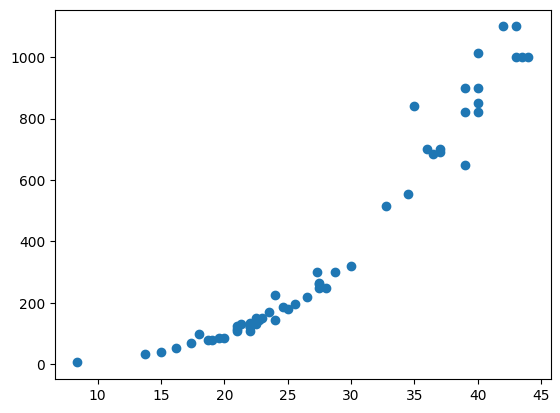

In [26]:
plt.scatter(X,y)

In [27]:
lm=LinearRegression()
lm.fit(X,y)

LinearRegression()

In [28]:
lm.coef_,lm.intercept_

(array([36.93837597]), -648.0775582457385)

In [29]:
tr_x,tt_x,tr_y,tt_y=train_test_split(X,y,random_state=1)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape

((42, 1), (14, 1), (42,), (14,))

In [30]:
lm=LinearRegression()
lm.fit(tr_x,tr_y)
lm.score(tr_x,tr_y),lm.score(tt_x,tt_y)

(0.921150162087582, 0.8801532075437282)

In [31]:
lm.intercept_

-618.6522360150107

In [32]:
py=35.66048008*tt_x+-618.6522360150107


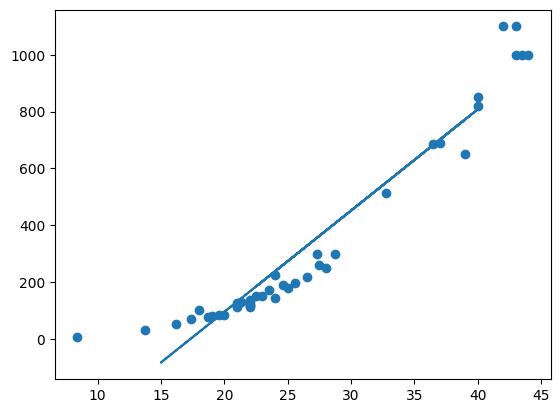

In [33]:
plt.scatter(tr_x,tr_y)
plt.plot(tt_x,py)

In [34]:
tr_x.min(),tr_x.max()

(8.4, 44.0)

In [35]:
lm.predict([[tr_x.min()]])

array([-319.10420335])

In [36]:
lm.predict([[tr_x.max()]])

array([950.40888748])

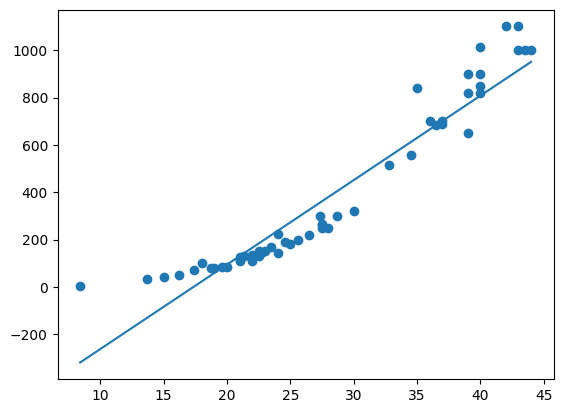

In [37]:
plt.scatter(X,y)
plt.plot([tr_x.min(),tr_x.max()],[-319.10420335,950.40888748])

In [38]:
n_tr_x=np.column_stack((tr_x**2,tr_x))
n_tt_x=np.column_stack((tt_x**2,tt_x))

In [39]:
n_tr_x

array([[ 441.  ,   21.  ],
       [ 262.44,   16.2 ],
       [ 576.  ,   24.  ],
       [1849.  ,   43.  ],
       [ 823.69,   28.7 ],
       [ 605.16,   24.6 ],
       [1521.  ,   39.  ],
       [1892.25,   43.5 ],
       [ 625.  ,   25.  ],
       [ 784.  ,   28.  ],
       [ 453.69,   21.3 ],
       [ 529.  ,   23.  ],
       [1600.  ,   40.  ],
       [ 745.29,   27.3 ],
       [ 484.  ,   22.  ],
       [1764.  ,   42.  ],
       [ 756.25,   27.5 ],
       [ 552.25,   23.5 ],
       [ 302.76,   17.4 ],
       [ 484.  ,   22.  ],
       [ 702.25,   26.5 ],
       [ 655.36,   25.6 ],
       [1600.  ,   40.  ],
       [1332.25,   36.5 ],
       [ 484.  ,   22.  ],
       [1936.  ,   44.  ],
       [ 506.25,   22.5 ],
       [ 576.  ,   24.  ],
       [ 349.69,   18.7 ],
       [ 361.  ,   19.  ],
       [1849.  ,   43.  ],
       [ 187.69,   13.7 ],
       [ 484.  ,   22.  ],
       [  70.56,    8.4 ],
       [ 484.  ,   22.  ],
       [ 324.  ,   18.  ],
       [ 441.  ,   21.  ],
 

In [40]:
n_lm=LinearRegression()
n_lm.fit(n_tr_x,tr_y)
n_lm.score(n_tr_x,tr_y),n_lm.score(n_tt_x,tt_y)

(0.9850904775950469, 0.9103276736107344)

In [41]:
n_lm=LinearRegression()
n_lm.fit(n_tr_x,tr_y)
n_lm.score(n_tr_x,tr_y),n_lm.score(n_tt_x,tt_y)

(0.9850904775950469, 0.9103276736107344)

In [42]:
n_lm.coef_

array([  1.00869625, -23.37339651])

In [43]:
n_lm.intercept_

156.30384190915487

In [44]:
py=n_lm.coef_[0]*n_tr_x[:,0]+n_lm.coef_[1]*n_tr_x[:,1]+n_lm.intercept_

In [45]:
py.shape

(42,)

In [46]:
tr_x.shape

(42, 1)

In [47]:
d=list(tr_x[:,0])
d.sort()
d

[8.4,
 13.7,
 16.2,
 17.4,
 18.0,
 18.7,
 19.0,
 19.6,
 20.0,
 21.0,
 21.0,
 21.0,
 21.3,
 22.0,
 22.0,
 22.0,
 22.0,
 22.0,
 22.5,
 23.0,
 23.5,
 24.0,
 24.0,
 24.6,
 25.0,
 25.6,
 26.5,
 27.3,
 27.5,
 28.0,
 28.7,
 32.8,
 36.5,
 37.0,
 39.0,
 40.0,
 40.0,
 42.0,
 43.0,
 43.0,
 43.5,
 44.0]

In [48]:
y=[n_lm.coef_[0]*i**2+n_lm.coef_[1]*i+n_lm.intercept_ for i in d]

In [49]:
y

[31.14091824105914,
 25.410507900586083,
 42.37706093403642,
 54.9996177182241,
 62.40028805499861,
 71.95231703092026,
 76.34865260840905,
 85.68601973572703,
 92.31440965196879,
 110.29755918567793,
 110.29755918567793,
 110.29755918567793,
 116.08589558136981,
 130.2981012095364,
 130.2981012095364,
 130.2981012095364,
 130.2981012095364,
 130.2981012095364,
 141.05489440527168,
 152.3160357235443,
 164.08152516435433,
 176.35136272770166,
 176.35136272770166,
 191.74090732546762,
 202.40408222200818,
 219.00406231386404,
 245.26577238249826,
 269.98134155903045,
 276.3619731021784,
 292.66659564582443,
 316.34037205279157,
 474.85220453952655,
 647.0104416360209,
 672.3933303853391,
 778.9683666079854,
 835.2819734545328,
 835.2819734545328,
 953.9613646180755,
 1016.3271489350709,
 1016.3271489350709,
 1048.2665632773746,
 1080.7103257422157]

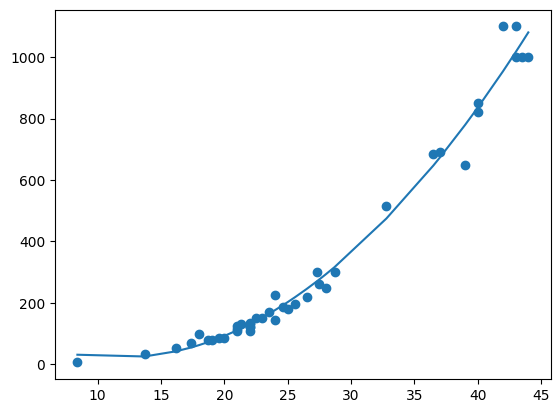

In [50]:
plt.scatter(tr_x,tr_y)
plt.plot(d,y)

In [51]:
lm=LinearRegression()
lm.fit(tr_x,tr_y)
lm.score(tr_x,tr_y),lm.score(tt_x,tt_y)

(0.921150162087582, 0.8801532075437282)

In [52]:
s_m=MinMaxScaler().fit(tr_x)
s_tr_x=s_m.transform(tr_x)
s_tt_x=s_m.transform(tt_x)

In [53]:
sdg_lm=SGDRegressor(max_iter=100000,shuffle=False)
sdg_lm.fit(tr_x,tr_y)
sdg_lm.score(tr_x,tr_y),sdg_lm.score(tt_x,tt_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


(0.9189234560702388, 0.8930423589967531)

In [54]:
sdg_lm=SGDRegressor(max_iter=10000,shuffle=False)
sdg_lm.fit(s_tr_x,tr_y)
sdg_lm.score(s_tr_x,tr_y),sdg_lm.score(s_tt_x,tt_y)

(0.9211376912455009, 0.8791612820886338)

In [55]:
tr_x

array([[21. ],
       [16.2],
       [24. ],
       [43. ],
       [28.7],
       [24.6],
       [39. ],
       [43.5],
       [25. ],
       [28. ],
       [21.3],
       [23. ],
       [40. ],
       [27.3],
       [22. ],
       [42. ],
       [27.5],
       [23.5],
       [17.4],
       [22. ],
       [26.5],
       [25.6],
       [40. ],
       [36.5],
       [22. ],
       [44. ],
       [22.5],
       [24. ],
       [18.7],
       [19. ],
       [43. ],
       [13.7],
       [22. ],
       [ 8.4],
       [22. ],
       [18. ],
       [21. ],
       [20. ],
       [19.6],
       [21. ],
       [37. ],
       [32.8]])

In [56]:
from sklearn.preprocessing import PolynomialFeatures
p_m=PolynomialFeatures(100,include_bias=False)
p_m.fit(tr_x)
p_tr_x=p_m.transform(tr_x)
p_tt_x=p_m.transform(tt_x)

In [57]:
lm=LinearRegression()
lm.fit(p_tr_x,tr_y)
lm.score(p_tr_x,tr_y),lm.score(p_tt_x,tt_y)

(0.8064776745741071, -0.08399291734474823)

In [58]:
lm=Lasso()
lm.fit(p_tr_x,tr_y)
lm.score(p_tr_x,tr_y),lm.score(p_tt_x,tt_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: RuntimeWarning: overflow encountered in square
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.446e+04, tolerance: 4.686e+02
  model = cd_fast.enet_coordinate_descent(


(0.9898811636898086, 0.8910885799107374)

In [59]:
#lm=Ridge()
#lm.fit(p_tr_x,tr_y)
#lm.score(p_tr_x,tr_y),lm.score(p_tt_x,tt_y)

In [60]:
X=pd.read_csv('data2.csv').to_numpy()
X

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

In [61]:
len(X)

56

In [62]:
y=np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0])

In [63]:
len(y)

56

In [64]:
tr_x,tt_x,tr_y,tt_y=train_test_split(X,y,random_state=42)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape

((42, 3), (14, 3), (42,), (14,))

In [65]:
lm=LinearRegression()
lm.fit(tr_x,tr_y)
lm.score(tr_x,tr_y),lm.score(tt_x,tt_y)

(0.9559326821885706, 0.8796419177546366)

In [66]:
p=PolynomialFeatures(include_bias=False)
p.fit(tr_x)
p_tr_x=p.transform(tr_x)
p_tt_x=p.transform(tt_x)

In [67]:
lm=LinearRegression()
lm.fit(p_tr_x,tr_y)
lm.score(p_tr_x,tr_y),lm.score(p_tt_x,tt_y)

(0.9903183436982125, 0.9714559911594111)

In [68]:
p=PolynomialFeatures(3,include_bias=False)
p.fit(tr_x)
p_tr_x=p.transform(tr_x)
p_tt_x=p.transform(tt_x)

In [69]:
lm=LinearRegression()
lm.fit(p_tr_x,tr_y)
lm.score(p_tr_x,tr_y),lm.score(p_tt_x,tt_y)

(0.9963872340980063, 0.9410534492229033)

In [70]:
p=PolynomialFeatures(4,include_bias=False)
p.fit(tr_x)
p_tr_x=p.transform(tr_x)
p_tt_x=p.transform(tt_x)

In [71]:
lm=LinearRegression()
lm.fit(p_tr_x,tr_y)
lm.score(p_tr_x,tr_y),lm.score(p_tt_x,tt_y)

(0.9995286898074028, -6.786696924886995)

In [72]:
laso=Lasso()
laso.fit(p_tr_x,tr_y)
laso.score(p_tr_x,tr_y),laso.score(p_tt_x,tt_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.523e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


(0.990281509377929, 0.9810523870311377)

In [73]:
ridg=Ridge()
ridg.fit(p_tr_x,tr_y)
ridg.score(p_tr_x,tr_y),ridg.score(p_tt_x,tt_y)

(0.9966639602538868, 0.9673900486768445)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.94664e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.71886e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


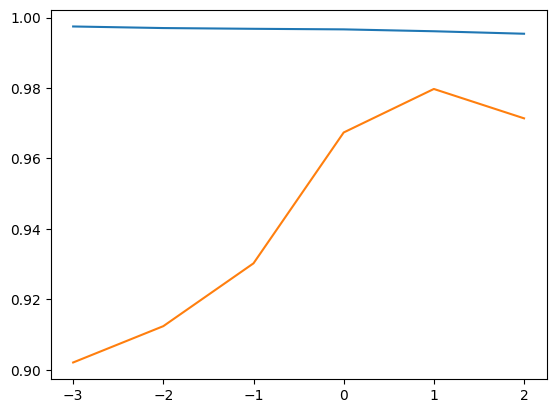

In [74]:
t_l=[]
tt_l=[]
for i in [0.001,0.01,0.1,1,10,100]:
  ridg=Ridge(alpha=i)
  ridg.fit(p_tr_x,tr_y)
  t_l.append(ridg.score(p_tr_x,tr_y))
  tt_l.append(ridg.score(p_tt_x,tt_y))
plt.plot([-3,-2,-1,0,1,2],t_l)
plt.plot([-3,-2,-1,0,1,2],tt_l)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.511e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.518e+04, tolerance: 5.183e

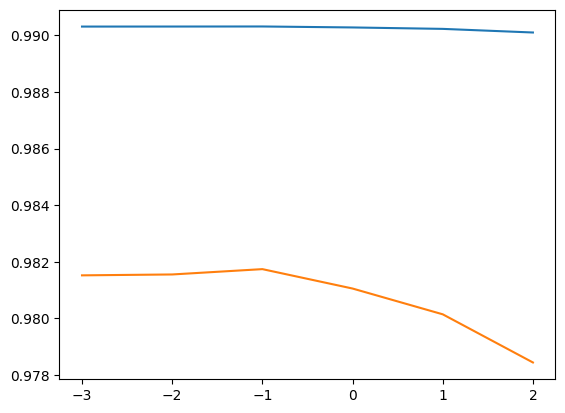

In [75]:
t_l=[]
tt_l=[]
for i in [0.001,0.01,0.1,1,10,100]:
  ridg=Lasso(alpha=i)
  ridg.fit(p_tr_x,tr_y)
  t_l.append(ridg.score(p_tr_x,tr_y))
  tt_l.append(ridg.score(p_tt_x,tt_y))
plt.plot([-3,-2,-1,0,1,2],t_l)
plt.plot([-3,-2,-1,0,1,2],tt_l)
plt.show()

In [76]:
end_la=Lasso(alpha=0.1)
end_rg=Ridge(alpha=10)

In [77]:
end_la.fit(p_tr_x,tr_y)
end_la.score(p_tr_x,tr_y),end_la.score(p_tt_x,tt_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.518e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


(0.9903157765893738, 0.9817382504370507)

In [78]:
end_rg.fit(p_tr_x,tr_y)
end_rg.score(p_tr_x,tr_y),end_rg.score(p_tt_x,tt_y)

(0.9961310506260523, 0.9797421816252633)

In [79]:
tr_x,tt_x,tr_y,tt_y=train_test_split(X,y,random_state=1)
tr_x.shape,tt_x.shape,tr_y.shape,tt_y.shape

((42, 3), (14, 3), (42,), (14,))

In [80]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
m1=LinearRegression()
m2=KNeighborsRegressor()
m3=Lasso()
m4=Ridge()
m5=SGDRegressor(max_iter=10000,shuffle=False)
m6=DecisionTreeRegressor(random_state=1)
hy=[]
for m in [m1,m2,m3,m4,m5,m6]:
  print(m,':',cross_val_score(m,tr_x,tr_y).mean())


LinearRegression() : 0.9097952380021223
KNeighborsRegressor() : 0.9595378154127033
Lasso() : 0.9100672356623065
Ridge() : 0.9124922141303917
SGDRegressor(max_iter=10000, shuffle=False) : -426482789219465.94
DecisionTreeRegressor(random_state=1) : 0.9448450039744738


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [81]:
m6=DecisionTreeRegressor(random_state=1)
m6.fit(tr_x,tr_y)

DecisionTreeRegressor(random_state=1)

In [82]:
m6.get_depth()

9

In [83]:
m1=LinearRegression()
cross_val_score(m1,tr_x,tr_y).mean()

0.9097952380021223

In [84]:
#best_p=
#m2=KNeighborsRegressor(n_neighbors=)#[1~10]
#m3=Lasso(alpha=)#[0.001,0.01,0.1,1,10,100]
#m4=Ridge(alpha=)#[0.001,0.01,0.1,1,10,100]
#m6=DecisionTreeRegressor(max_depth=,random_state=1)#[1~9]
m2.fit(tr_x,tr_y)
print(m2.score(tr_x,tr_y),m2.score(tt_x,tt_y))
m3.fit(tr_x,tr_y)
print(m3.score(tr_x,tr_y),m3.score(tt_x,tt_y))
m4.fit(tr_x,tr_y)
print(m4.score(tr_x,tr_y),m4.score(tt_x,tt_y))
m6.fit(tr_x,tr_y)
print(m6.score(tr_x,tr_y),m6.score(tt_x,tt_y))


0.9917383570317786 0.9386417911903259
0.9330145993309485 0.9503299130576008
0.9329274084253412 0.9492647932719468
1.0 0.8905129432083339


Q1 보스턴 데이터를 이용하여 선형 분석에서 배웠던 방식을 적용하여 최적의 모델과 최적의 파라미터 값을 구하시오(1개만)

In [85]:
from sklearn import datasets
X,y=datasets.fetch_openml('boston',return_X_y=True)
X

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [86]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64